# Overfitting Demo
## Purpose
Illustrate the issues of overfitting a model and how this can affect our training and test accuracy.

## References
Note that details from this lesson come from the following source. Recommended reading if you want to learn more!

http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


# Comments from Lee
The notebook is super clear. I think we should have no problem going through this. One thing that might be nice though is if we could supply a starter notebook that contains the following:
- Initializing the libraries
- Initializing the data and true functions
- Initializing X_test

Also a note about this line of code:

    pipeline.fit(X[:, np.newaxis],y)

I have been using 

    X.reshape(30,1)

I both methods work fine but I think we should try to be consistent in the lesson. I am fine with using either. 

We may also want to show the training scores, cross validation scores, and test scores after each regression to show why test data is so important. 

In [228]:
# Initialize all our libraries

%matplotlib inline
import matplotlib # I dont think this import is necessary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Cross validation
# from sklearn.model_selection import cross_val_score
# If you have issues with sklearn.model_selection, use the line below instead
from sklearn.cross_validation import cross_val_score

In [229]:
# Import some random, but deterministic data
np.random.seed(2)

# Define number of samples we take
n_samples = 20
degrees = [1, 4, 15]

# Create a function which generates our cos function data
true_fun = lambda X: np.cos(5 * np.pi * X)

# Setup our x data from the random generator
X = np.sort(np.random.rand(n_samples))

# The true data that we check the model against. Note that we will add some random noise as well to keep things interesting
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Let's check the size of our data
print X.shape
print y.shape

# We notice that X and y don't appear like regular arrays. Python seems OK with this in general, 
# but we start to hit issues when we want to treat these objects like regular arrays

X = np.reshape(X,(len(X),1))
y = np.reshape(y,(len(y),1))

# Check our shapes again to check
print X.shape,  y.shape
# Excellent!

# Let's cut our data into a training set and a testing set. Grab the last 10 points as test data. The rest is training data
slice = 10

x_test = X[-slice:]
y_test = y[-slice:]

# Cut X and y down to make the training data
X = X[:len(X)-slice]
y = y[:len(y)-slice]


(20L,)
(20L,)
(20L, 1L) (20L, 1L)


## 1 degree polynomial regression

In [230]:
# Let's fit a straight line through our data with regression model.

# Set the degree of the polynomial
polydegree = 1

# Create the features
polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

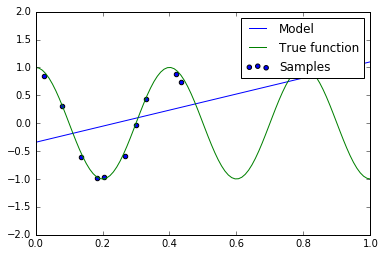

In [231]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
X_test = X_test.reshape(len(X_test),1)

plt.plot(X_test, pipeline.predict(X_test), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))
plt.legend()
plt.show()

In [232]:
# Let's get a quantitative measure of how this model is doing and replot.
# Check how the data does with training data
print 'training',pipeline.score(X,y)

# Test it on the test data
print 'testing', pipeline.score(x_test,y_test)




training 0.0713423356173
testing -0.405279423301


We see that our line fits the general trend but the overal fit is quite bad. Let's do this again with second order.

## Fit a 2 degree polynomial

In [233]:
# Let's fit a degree 2 polynomial through our data with regression model.
polydegree = 2

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

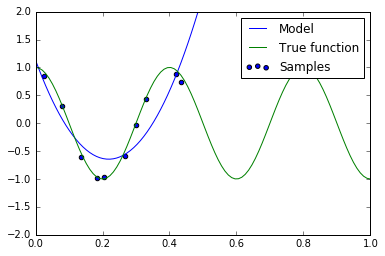

In [234]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))
plt.legend()
plt.show()

In [235]:
# Let's get a quantitative measure of how this model is doing and replot.
# Check how the data does with training data
print 'training',pipeline.score(X,y)

# Test it on the test data
print 'testing', pipeline.score(x_test,y_test)




training 0.792753016505
testing -107.797207851


### Conclusions on  2nd degree polynomial
We see our data fit gets a lot better. 
Training data gets a little better
Testing data gets a lot better
We assume it continues to improve with more degrees

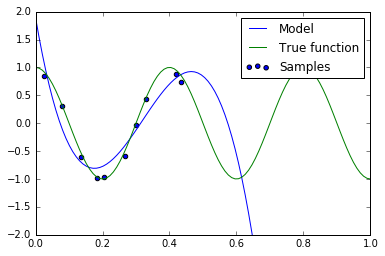

training 0.905428102446
testing -132.430664676


In [236]:
polydegree = 3

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))
plt.legend()
plt.show()

# Let's get a quantitative measure of how this model is doing and replot.
# Check how the data does with training data
print 'training',pipeline.score(X,y)

# Test it on the test data
print 'testing', pipeline.score(x_test,y_test)




This looks much better. 
Both training and test error went down
Why not keep adding degrees?

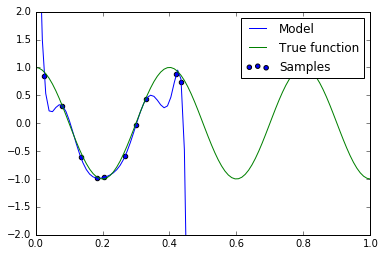

training 1.0
testing -3.53959302913e+12


In [237]:
polydegree = 15

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))
plt.legend()
plt.show()

# Let's get a quantitative measure of how this model is doing and replot.
# Check how the data does with training data
print 'training',pipeline.score(X,y)

# Test it on the test data
print 'testing', pipeline.score(x_test,y_test)


## So what have we learned?
Something is clearly wrong here. We are no longer fitter the true data. 
We are now overfitting because we fail to represent the true trend. 

Because we know the true trend of the data (a sine wave), we can see that if we tried to use this model on new data, it would *miserably fail*. This would be a case of overfitting. We would see that our training error is going to zero, but our testing error is very, ***very*** high.

What can we do?

We realize that we need to strike a fine balance so that we don't overfit the model


## Solutions to Overfitting
### Regularization
Regularization can also help us reduce the overfitting. 

### Experiment with polynomial degrees
Try a variety of polynomial degrees and choose the model with the lowest testing error.
Let's try this below



[0.071342335617289754, 0.7927530165053962, 0.90542810244622618, 0.9966737790656659, 0.99819705783963308, 0.99820332775052389, 0.99940530719224463]
[-0.4052794233008199, -107.79720785095405, -132.43066467551631, -21246.182779305775, -1391.8990964971058, -96.444570690249719, -10219988.745182399]


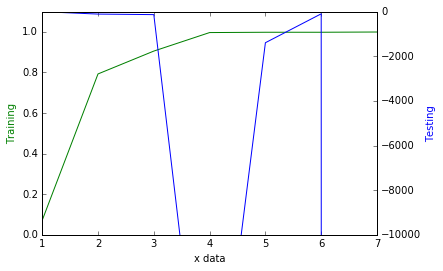

In [276]:
# Choose the degrees we will examine
degrees = np.arange(1,8)
e_train = [] 
e_test = []

# Train our model for each degree polynomial
for polydegree in degrees:
    polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    pipeline.fit(X,y)
    e_train.append(pipeline.score(X,y))
    e_test.append(pipeline.score(x_test,y_test))

print e_train
print e_test

# Plot our data on two axis to show the scale 
fig, ax1 = plt.subplots()
plt.ylim((0,1.1))
ax2 = ax1.twinx()
ax1.plot(degrees, e_train, 'g-')
ax2.plot(degrees,e_test, 'b-')
ax1.set_xlabel('x data')
ax1.set_ylabel('Training',color='g')
ax2.set_ylabel('Testing',color='b')

plt.ylim((-1e4,3))
#plt.xlim((0,1+len(degrees)))
plt.show()